

# Defining libraries and processing data from the dataset

In [ ]:

#importing the required libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
!pip install pydicom
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
!pip install neupy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 4.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 226 kB 5.3 MB/s 
     |████████████████████████████████| 92.7 MB 35 kB/s 
     |████████████████████████████████| 367 kB 52.3 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 3.2 MB 40.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 

In [ ]:
%%javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}setInterval(ClickConnect,60000)

<IPython.core.display.Javascript object>

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import torch

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cpu



Data preprocessing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


512

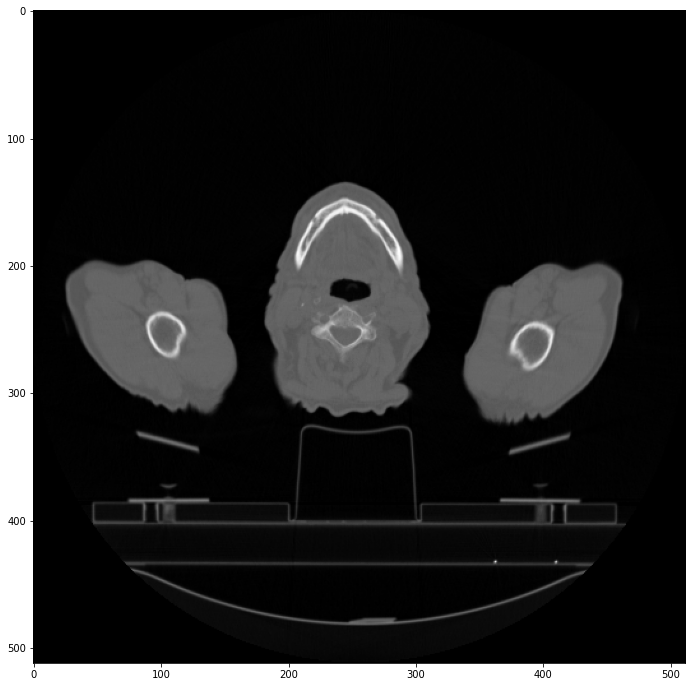

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


class Dataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, list_IDs, labels):
        'Initialization'
        self.labels = labels
        self.list_IDs = list_IDs

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.list_IDs)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        ID = self.list_IDs[index]

        # Load data and get label
        X = torch.as_tensor( ID )
        y = self.labels[index]

        return X, y

patients = []
labels = []
for i in range (1,1000):
  path = "/content/drive/MyDrive/research_data/stage1/image" + " (" + str(i) + ").dcm"
  dicom = pydicom.read_file(path)
  if 'Image Storage' not in dicom.SOPClassUID.name:
   continue
  data_voi = apply_voi_lut(dicom.pixel_array, dicom)
  data = dicom.pixel_array
  data_voi = data_voi - np.min(data_voi)
  data_voi = data_voi / np.max(data_voi)
  data_voi = (data_voi * 255).astype(np.uint8)
  patients.append(data_voi)
  labels.append(0)

for i in range (1,1000):
  path = "/content/drive/MyDrive/research_data/stage2/image" + " (" + str(i) + ").dcm"
  dicom = pydicom.read_file(path)
  if 'Image Storage' not in dicom.SOPClassUID.name:
   continue
  data_voi = apply_voi_lut(dicom.pixel_array, dicom)
  data = dicom.pixel_array
  data_voi = data_voi - np.min(data_voi)
  data_voi = data_voi / np.max(data_voi)
  data_voi = (data_voi * 255).astype(np.uint8)
  patients.append(data_voi)
  labels.append(1)
for i in range (1,1000):
  path = "/content/drive/MyDrive/research_data/stage3a/image" + " (" + str(i) + ").dcm"
  dicom = pydicom.read_file(path)
  if 'Image Storage' not in dicom.SOPClassUID.name:
   continue  # to skip the rest of the loop
  data_voi = apply_voi_lut(dicom.pixel_array, dicom)
  data = dicom.pixel_array
  data_voi = data_voi - np.min(data_voi)
  data_voi = data_voi / np.max(data_voi)
  data_voi = (data_voi * 255).astype(np.uint8)
  patients.append(data_voi)
  labels.append(2)
for i in range (1,1000):
  path = "/content/drive/MyDrive/research_data/stage3b/image" + " (" + str(i) + ").dcm"
  dicom = pydicom.read_file(path)
  if 'Image Storage' not in dicom.SOPClassUID.name:
   continue  # to skip the rest of the loop
  data_voi = apply_voi_lut(dicom.pixel_array, dicom)
  data = dicom.pixel_array
  data_voi = data_voi - np.min(data_voi)
  data_voi = data_voi / np.max(data_voi)
  data_voi = (data_voi * 255).astype(np.uint8)
  patients.append(data_voi)
  labels.append(3)

patient_train, patient_test, label_train, label_test = train_test_split( patients, labels, test_size=0.33, random_state=42)
train_dataset = Dataset(patient_train, label_train)
validation_dataset = Dataset(patient_test, label_test)
plt.figure(figsize = (12,12))
plt.imshow(data_voi, 'gray')
row = len(patient_train[2])
row

In [ ]:
patient_train = np.array(patient_train)
patient_test = np.array(patient_test)
label_train = np.array(label_train)
label_test = np.array(label_test)


data shape for model fitting

In [ ]:
#loading data

#(X_train,y_train) , (X_test,y_test)=mnist.load_data()
#reshaping data
#X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
#X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
#checking the shape after reshaping
print(np.shape(patient_train))
print(np.shape(patient_test))
#normalizing the pixel values
#X_train=X_train/255
#X_test=X_test/255

(4918, 512, 512)
(2423, 512, 512)


# CNN Models

Personal CNN model

In [ ]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(512,512,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(512,512,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
#adding output layer
model.add(Dense(4,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
histroy = model.fit(patient_train,label_train,epochs=10)

Model evaluation


In [ ]:
#evaluting the model
model.evaluate(patient_test,label_test)
print(histroy.history.keys())
# summarize history for accuracy
plt.plot(histroy.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(histroy.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# DNN Model

In [ ]:
#defining DNN with two layers of 100 nodes
model1 = Sequential()
model1.add(Flatten(input_shape = (512,512,1)))
model1.add(Dense(units=105,
  activation='relu'))
model1.add(Dense(units=105,
  activation='relu'))
model1.add(Dense(units=4,
  activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',
  optimizer='adam', metrics=['accuracy'])

#training model
num_epochs = 10
h = model1.fit(patient_train, label_train, epochs=num_epochs)

for i in range(num_epochs):
  if i % 1 == 0:
    los = h.history['loss'][i]
    acc = h.history['accuracy'][i] * 100
    print("epoch: %5d loss = %0.4f acc = %0.2f%%" \
        % (i, los, acc))


eval = model1.evaluate(patient_test, label_test, verbose=0)
print("\nEvaluation on test data: \nloss = %0.4f \
  accuracy = %0.2f%%" % (eval[0], eval[1]*100) )


# RNN models

simple RNN model

In [ ]:
from keras.layers import SimpleRNN
model2 = Sequential()
#simple rnn with 256 nodes
model2.add(SimpleRNN(128, input_shape = (512,512), return_sequences = True))
model2.add(SimpleRNN(128, return_sequences = True))
model2.add(SimpleRNN(128, return_sequences = False))
#dropout layer
model2.add(Dropout(0.2))
#output layer
model2.add(Dense(units = 4, activation = 'softmax'))
#compiling
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#training
history1 = model2.fit(patient_train,label_train,epochs=10)

Evaluating model

In [ ]:
#evaluting the model
model2.evaluate(patient_test,label_test)
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

LSTM Model

In [ ]:
#defining LSTM with 256 nodes
model3 = Sequential()
model3.add(tf.keras.layers.LSTM(256, input_shape = (512, 512)))
#dropout layer
model3.add(Dropout(0.2))
#output layer
model3.add(Dense(4, activation = 'softmax' ))
model3.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#training
history2 = model3.fit(patient_train,label_train,epochs=10)

In [ ]:
#evaluting the model
model3.evaluate(patient_test,label_test)
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Scikit Learn Models

Data Flattening for compatability

In [ ]:
nsamples, nx, ny = patient_train.shape
patient_train2= patient_train.reshape((nsamples,nx*ny))
nsamples1, nx1, ny1 = patient_test.shape
patient_test2= patient_test.reshape((nsamples1,nx1*ny1))
print(np.shape(patient_train2))

(4918, 262144)


SVM Model

In [ ]:
model = svm.SVC(kernel = 'linear')
model.fit(patient_train2, label_train)
pred = model.predict(patient_test2)
print("Accuracy:",metrics.accuracy_score(label_test, pred))

Accuracy: 0.9624432521667354


RT Model

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(patient_train2, label_train,num_epochs=10)
pred1 = model.predict(patient_test2)
print("Accuracy:",metrics.accuracy_score(label_test, pred1))
print("Loss:",metrics.log_loss(label_test, pred1))

DT Model

In [ ]:
model = DecisionTreeClassifier(random_state=42, max_depth = 10)
model.fit(patient_train2, label_train,num_epochs=10)
pred2 = model.predict(patient_test2)
print("Accuracy:",metrics.accuracy_score(label_test, pred2))
print("Loss:",metrics.log_loss(label_test, pred2))

LVQ model

In [ ]:

from neupy import algorithms
model = algorithms.LVQ3(n_inputs = 5, n_classes = 4)
model.train(patient_train2, label_train, epochs = 10)
pred3 = model.predict(patient_test2)
print("Accuracy:",metrics.accuracy_score(label_test, pred3))

Naive Bayes Model

In [ ]:
model = GaussianNB()
model.fit(patient_train2, label_train,num_epochs=10)
pred4 = model.predict(patient_test2)
print("Accuracy:",metrics.accuracy_score(label_test, pred4))

In [ ]:
!python --version
print(keras.__version__)
print(tf.__version__)
print(sklearn.__version__)
print(pydicom.__version__)
